# Make_blobs 함수를 통해 분류 데이터 생성 및 학습
빨간 점은 support vector, 굵은 회색 건이 hyper plane

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
x,y=make_blobs(n_samples=40,centers=2,random_state=20)
clf=svm.SVC(kernel="linear")
clf.fit(x,y)
# 추후에 "linear"을 변경해서 kernel을 조절할 수 있음

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

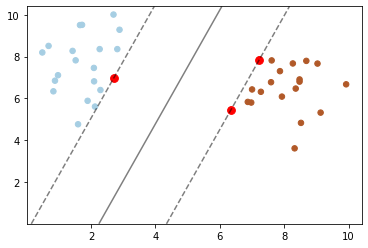

In [19]:
# 점들을 모두 좌표평면에 표현

plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.Paired)
# 초평면 표현
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
# 좌표평면 만들기
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(xlim[0],xlim[1],30)
yy,xx=np.meshgrid(yy,xx)

# get the separating hyperplane, xx.ravel이랑 yy.ravel을 위에서 아래로 붙이기
xy=np.vstack([xx.ravel(),yy.ravel()]).T
# boundary 표시
z=clf.decision_function(xy).reshape(xx.shape)
ax.contour(xx,yy,z,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
# 지지벡터(support vector) 표현
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=60,facecolors="r")
plt.show()

# linear 에서 rbf로 변경해서 kernel을 조절
선형 svm이 아니라 비선형!

In [20]:
x,y=make_blobs(n_samples=40,centers=2,random_state=20)
clf=svm.SVC(kernel="rbf")
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

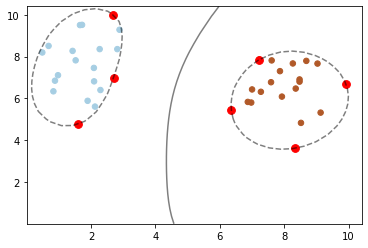

In [21]:
# 점들을 모두 좌표평면에 표현

plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.Paired)
# 초평면 표현
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
# 좌표평면 만들기
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(xlim[0],xlim[1],30)
yy,xx=np.meshgrid(yy,xx)

# get the separating hyperplane
xy=np.vstack([xx.ravel(),yy.ravel()]).T
# boundary 표시
z=clf.decision_function(xy).reshape(xx.shape)
ax.contour(xx,yy,z,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
# 지지벡터(support vector) 표현
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=60,facecolors="r")
plt.show()